# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Иванов Никола БВТ2005
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import copy
import time
%matplotlib inline

In [2]:
def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

 
def create_graph(graph, matrix, way = [], node_color='grey',edge_color = 'grey', edge_text_pos = 0.5, node_size=2000, 
                 node_alpha=0.3,way_color = 'green', edge_alpha=0.3, edge_tickness=3, node_text_size=14, text_font='arial'):
    
    plt.figure(num=None, figsize=(13, 10), dpi=220)
    matrix_size = len(matrix)
    way_edge = []
    for i in range(len(way) - 1):
        way_edge.append((way[i], way[i + 1]))
        
    node_colors = []
    for i in range(matrix_size):
        graph.add_node(i + 1,pos = (i + 2,i * 2))
        if i + 1 in way:
            node_colors.append(way_color)
        else:
            node_colors.append(node_color)
        
    edges = []
    sides = []
    edge_colors = []
    for i in range(matrix_size):
        for j in range(matrix_size):
            if matrix[i][j] != 0:
                graph.add_edge(i + 1, j + 1, weight = matrix[i][j])
                edges.append((i + 1, j + 1))
                sides.append(matrix[i][j])
                if (i + 1, j + 1) not in way_edge: edge_colors.append(edge_color)
                else:
                    edge_colors.append(way_color)
   
    # layout set
    graph_pos = nx.circular_layout(graph)
    # draw graph
    nx.draw_networkx_nodes(graph,graph_pos,node_size=node_size, alpha=node_alpha, node_color=node_colors)
    nx.draw_networkx_edges(graph,graph_pos,width=edge_tickness, alpha=edge_alpha,edge_color=edge_colors)
    nx.draw_networkx_labels(graph, graph_pos,font_size=node_text_size, font_family=text_font)
    
    edge_labels = dict(zip(edges, sides))
    nx.draw_networkx_edge_labels(graph, graph_pos, edge_labels=edge_labels, label_pos=edge_text_pos)

    # show graph
    plt.show()

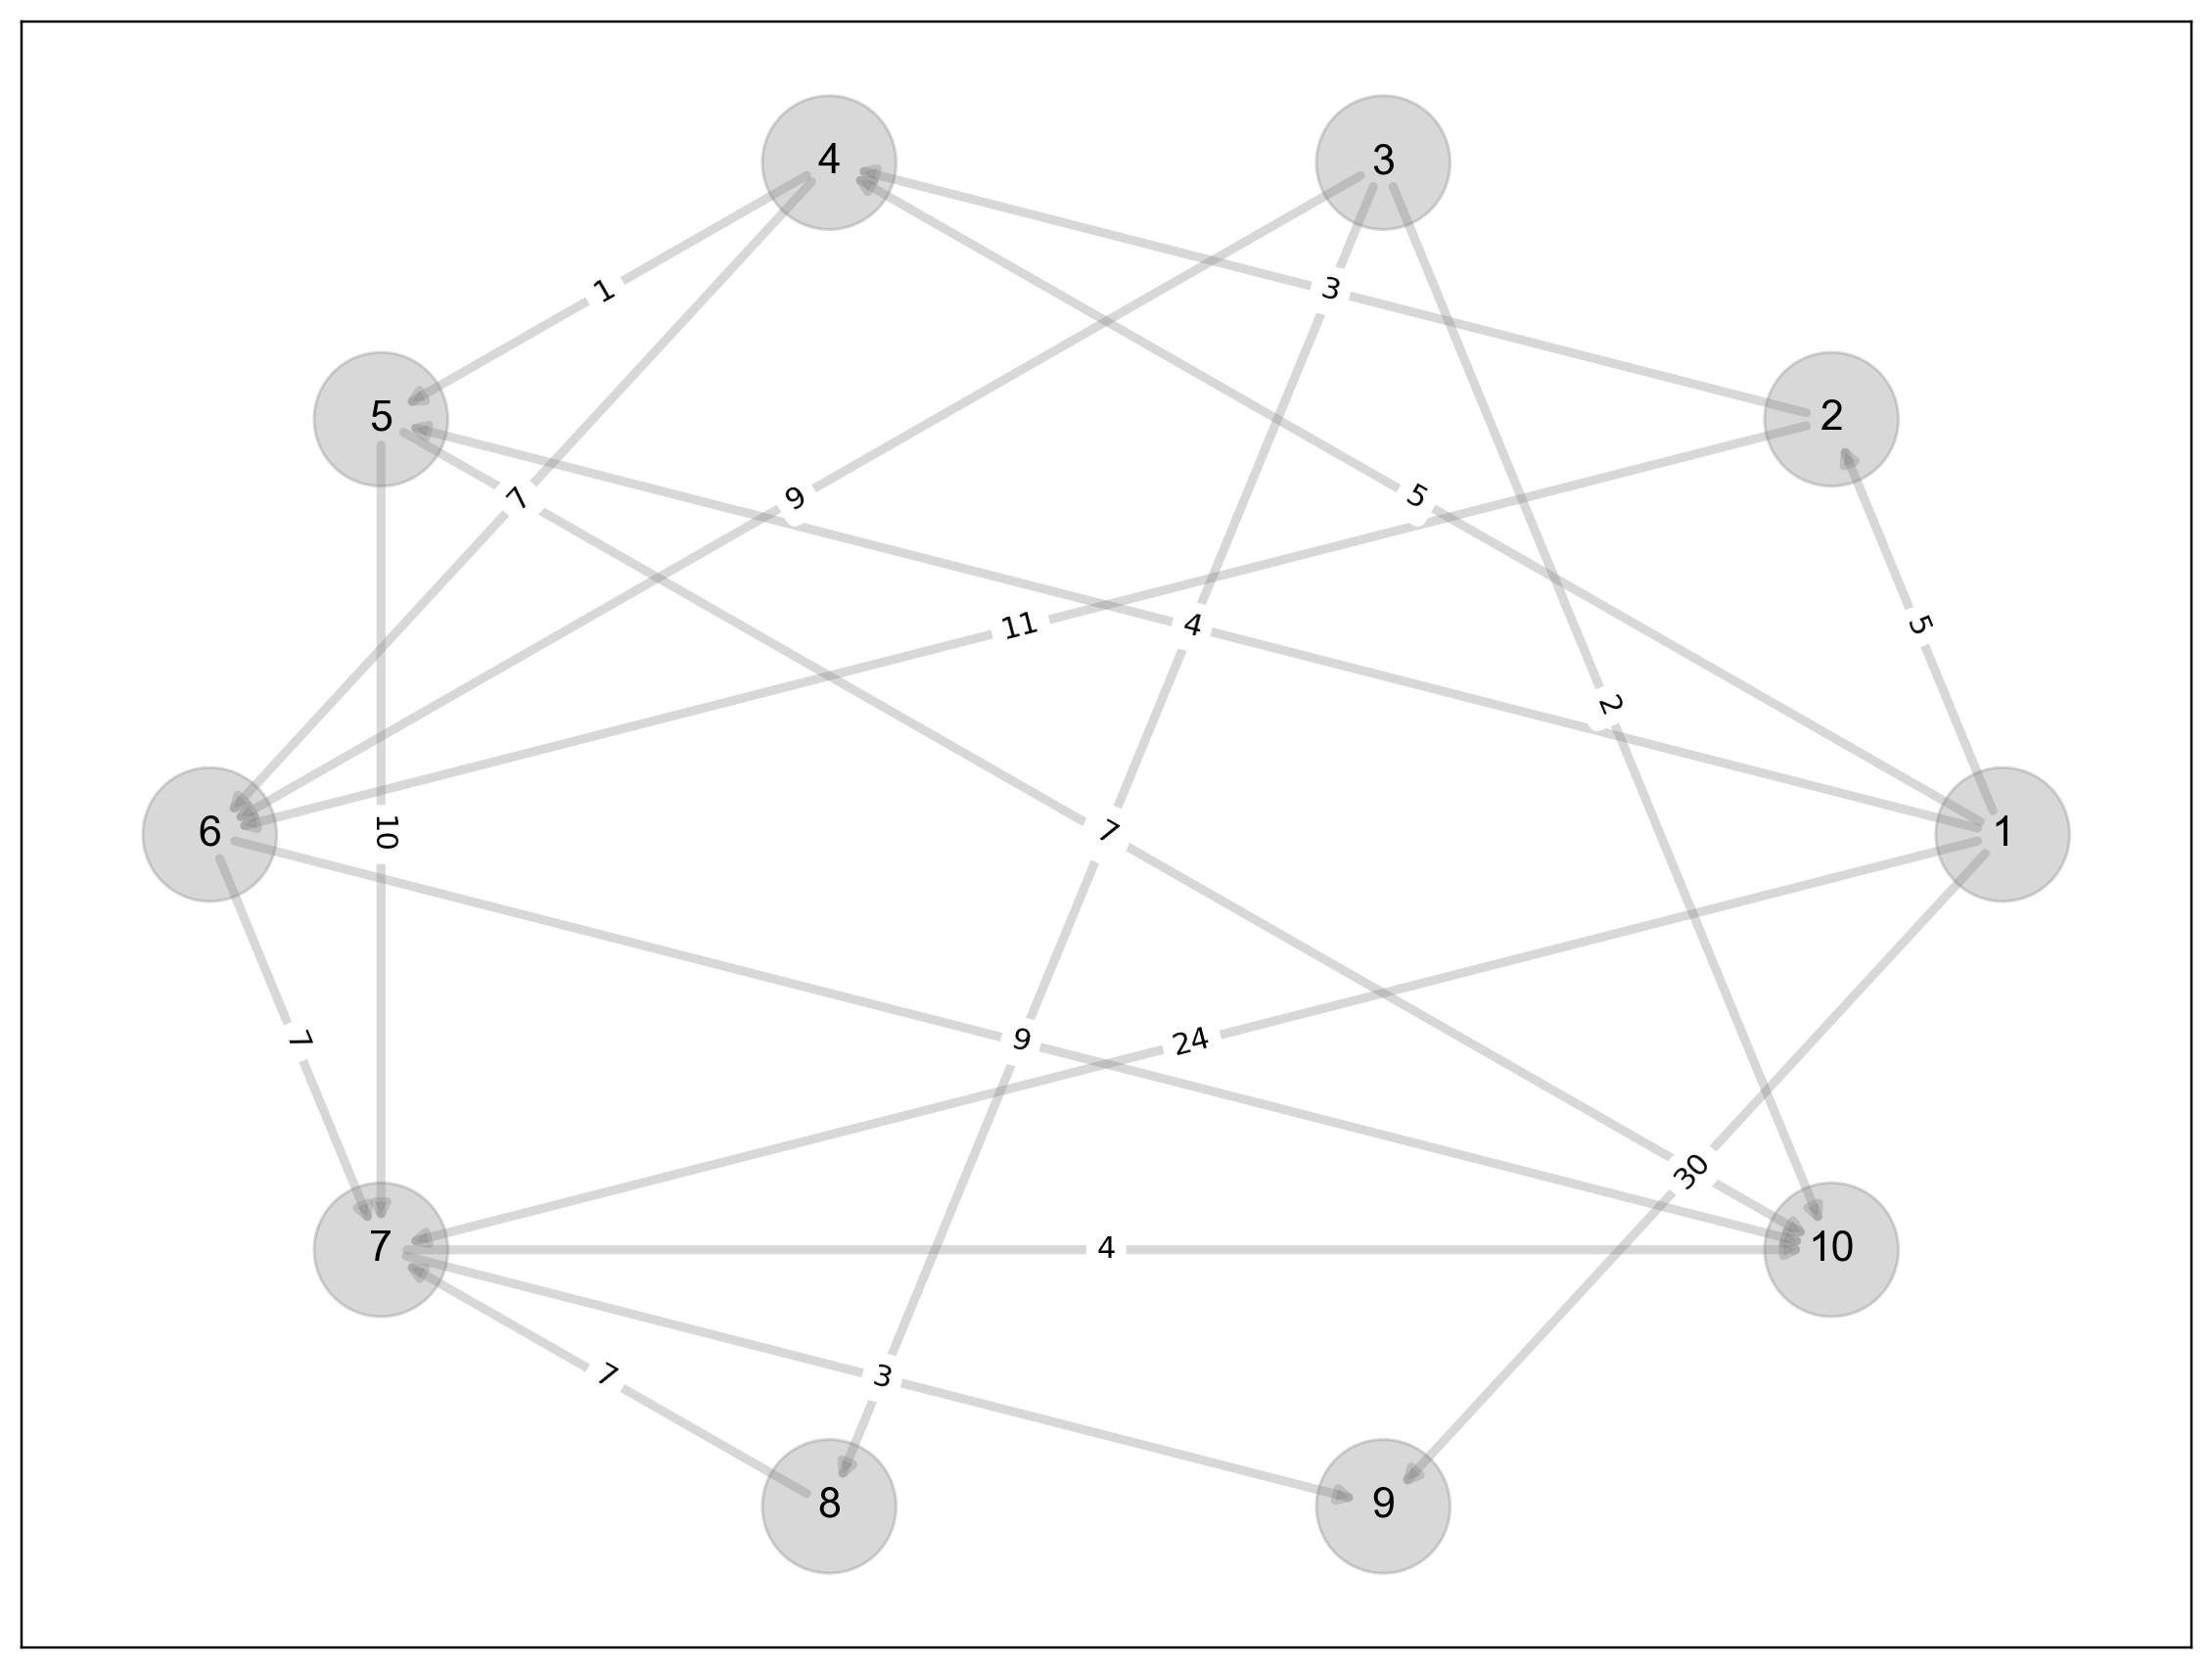

In [3]:
graph = nx.DiGraph()
matrix = read_matrix('src/lab_06_03_in.txt')
create_graph(graph, matrix)

labels = nx.get_edge_attributes(graph,'weight')
nodes_len = len(graph.nodes)
adj_matrix = np.array([[math.inf] * nodes_len] * nodes_len)
for pos, length in labels.items():
    adj_matrix[pos[0] - 1][pos[1] - 1] = length

paths_search_time = dict()

# Алгоритм Флойда-Уоршелла

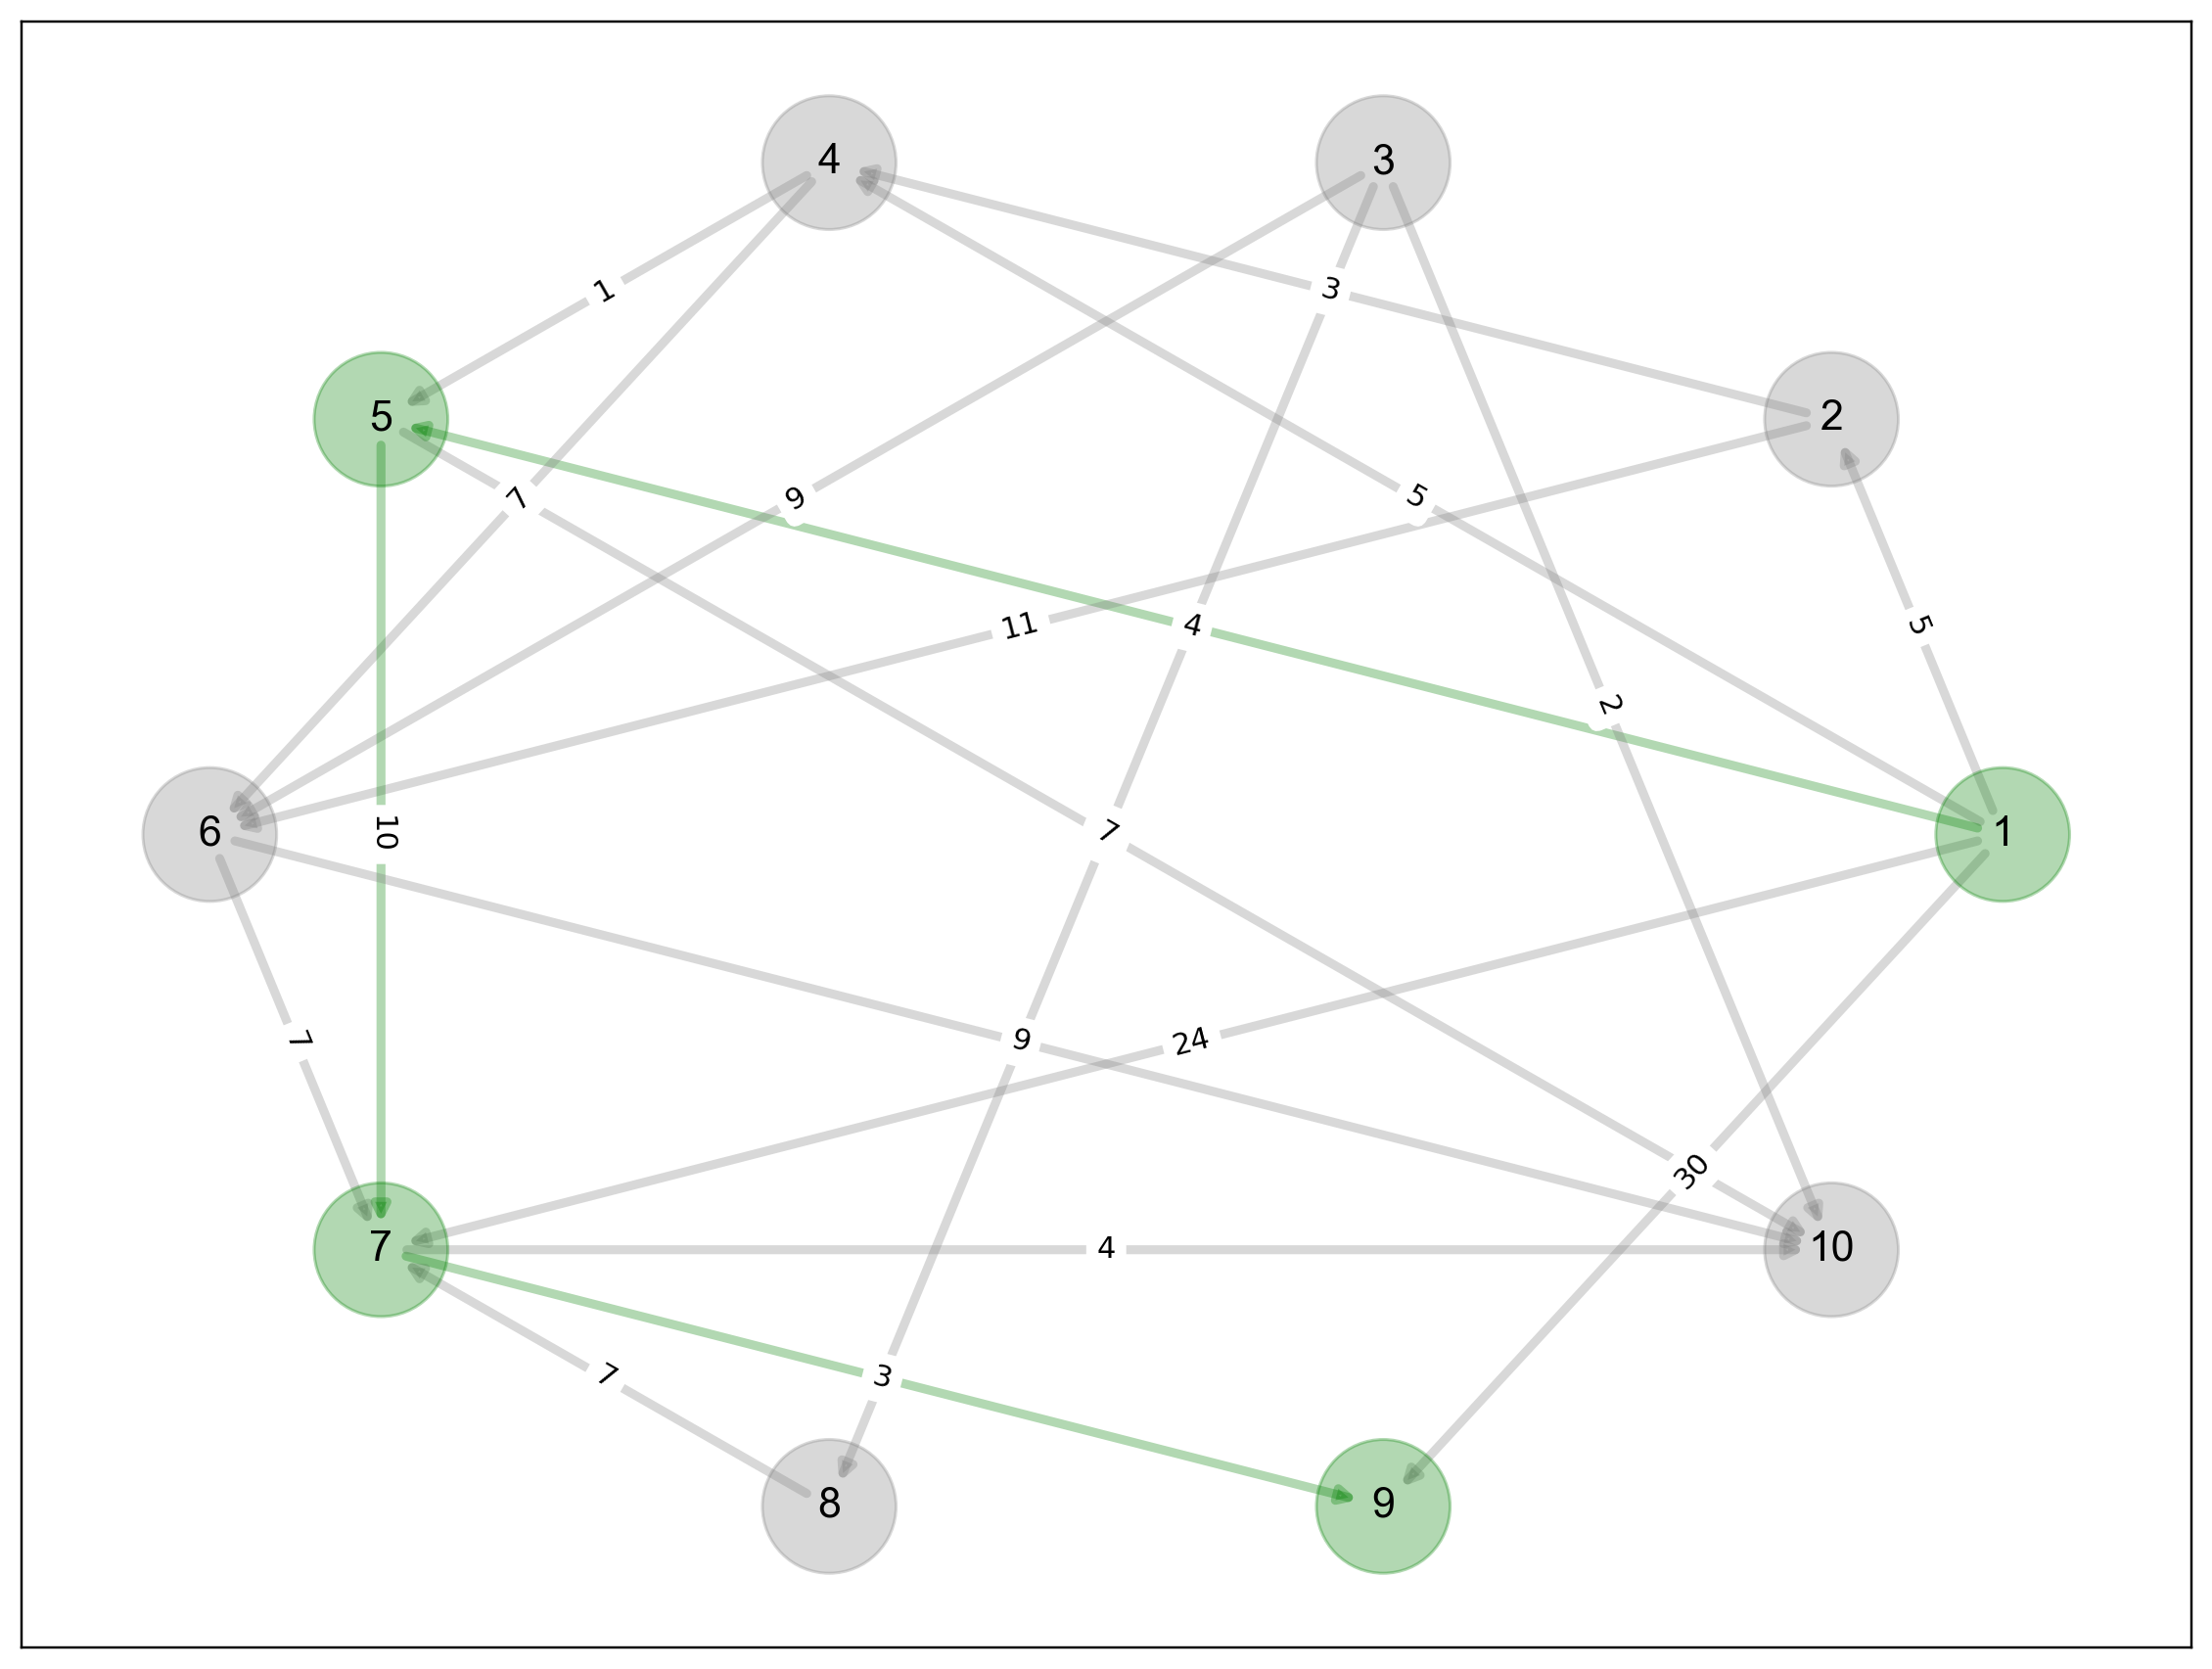

In [4]:
def fw_get_path(path, start, end):
    way = [start]
    while start != end:
        start = path[start][end]
        way.append(start)
    for i in range(len(way)):
        way[i] += 1
    return way

    
def floyd_warshall_path(matrix, start, end):
    start -= 1
    end -= 1
    for i in range(len(matrix)):
        matrix[i][i] = 0
   
    path = [[v for v in range(len(matrix))] for u in range(len(matrix))]
    for k in range(len(matrix)):                # k таблиц -в конце кратчайшие пути 
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][k] < math.inf and matrix[k][j] < math.inf and matrix[i][j] > matrix[i][k] + matrix[k][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]
                    path[i][j] = path[i][k]
    
    return fw_get_path(path,start,end)

start = 1
end = 9
create_graph(graph, matrix, way = floyd_warshall_path(copy.deepcopy(adj_matrix), start, end))


# Алгоритм Дейкстры

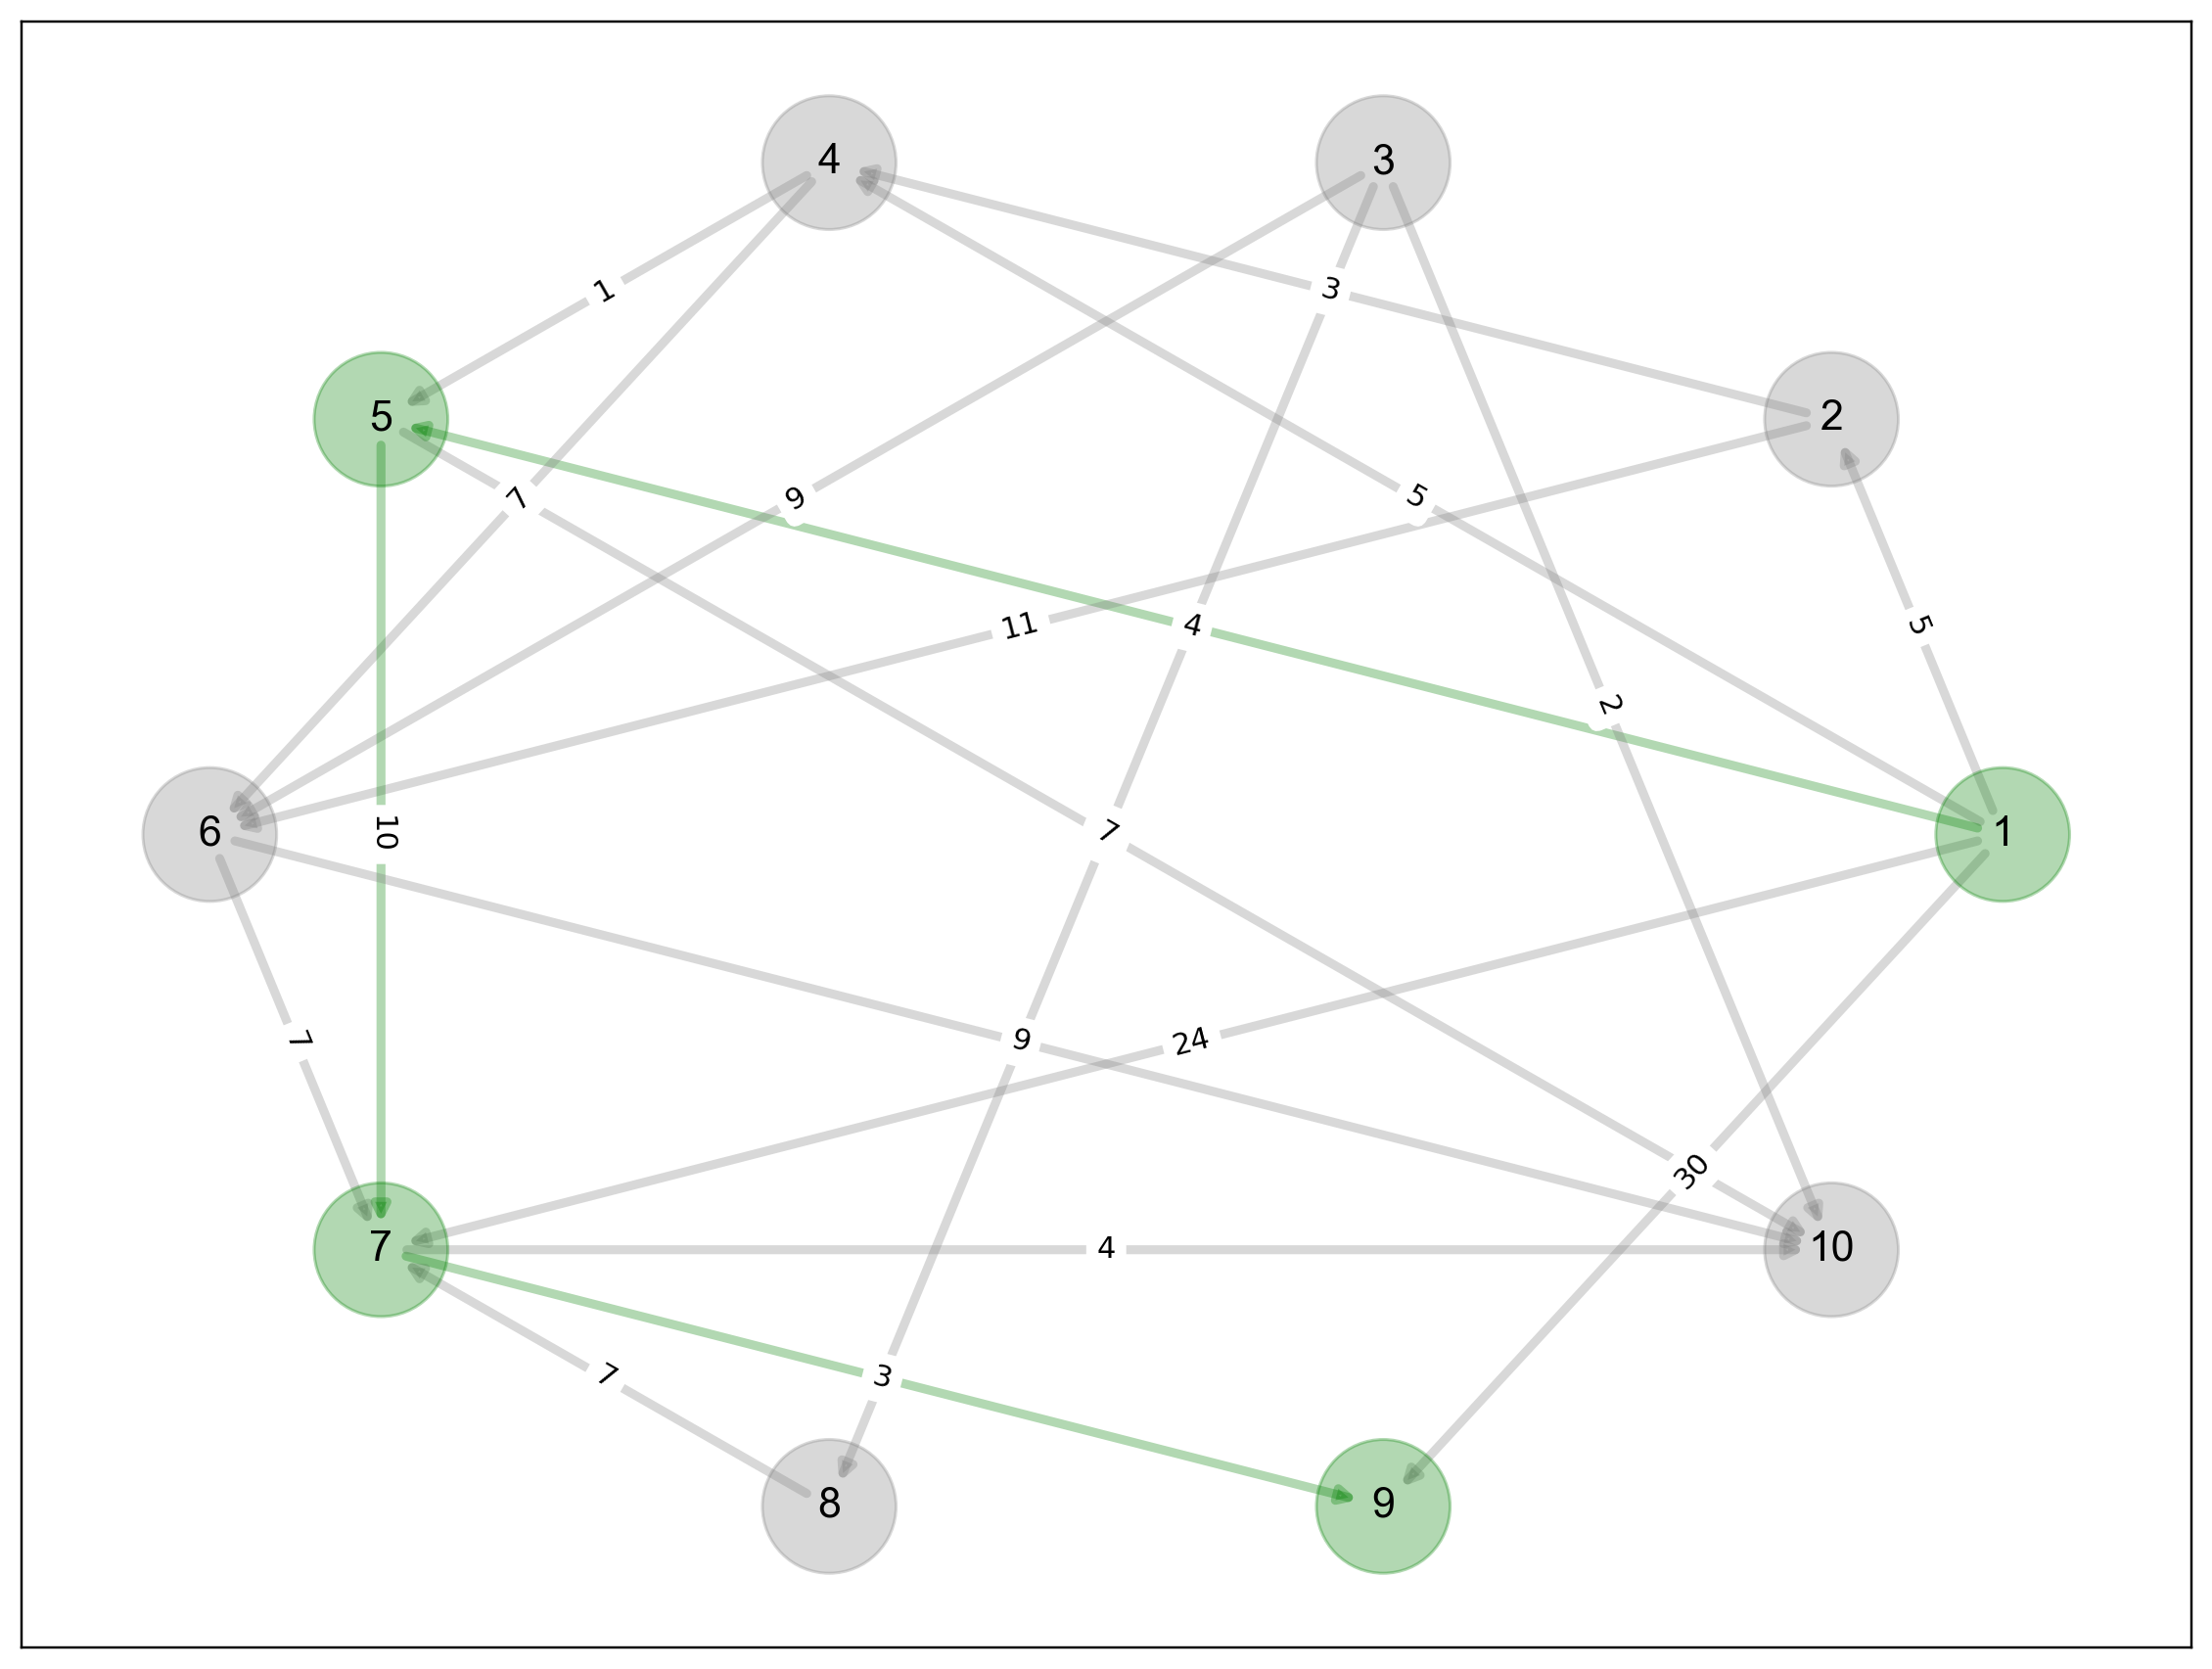

In [5]:
def d_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    for i in range(len(result)):
        result[i] += 1
    return result[::-1]


def dijkstra_path(matrix, start, end):
    start -= 1
    end -= 1
    
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
   
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node
    
    
    if dist[end] == math.inf:
        return [], dist
    else:
        return d_get_path(prev, start, end), dist

start = 1
end = 9
res = dijkstra_path(copy.deepcopy(adj_matrix), start, end)
create_graph(graph, matrix, way = res[0])


# Алгоритм Беллмана-Форда

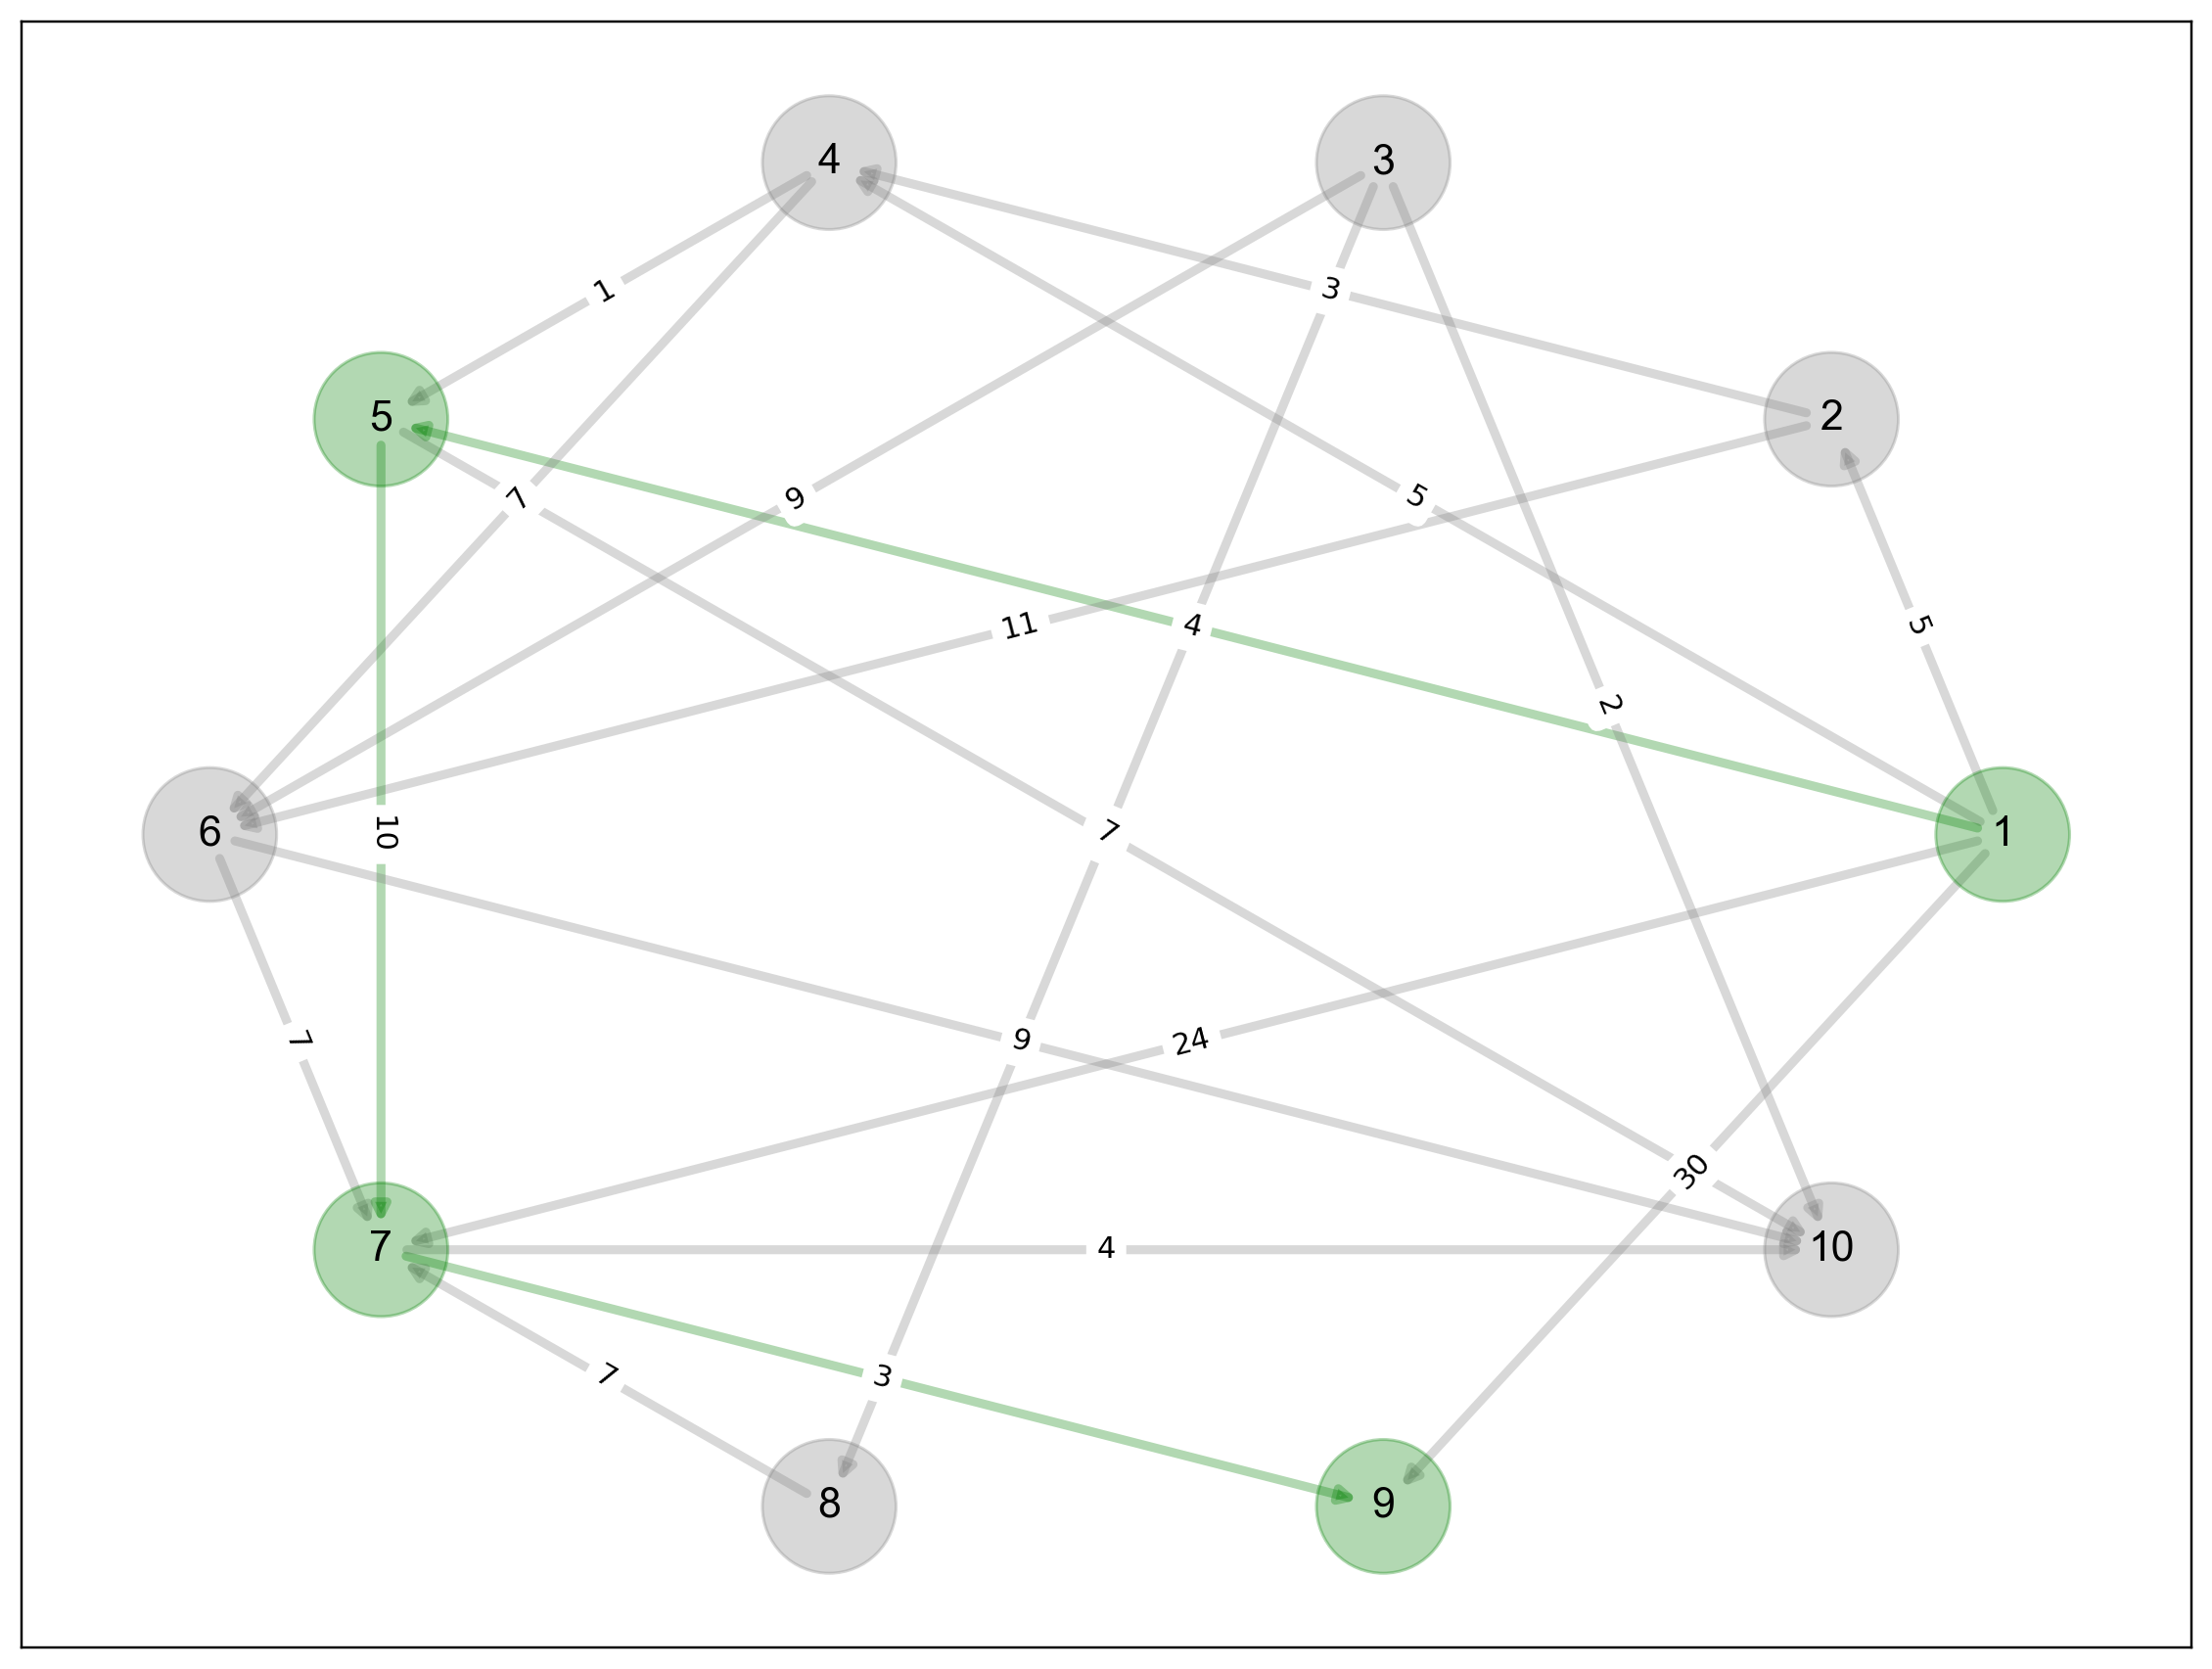

In [10]:
def bellman_ford_path(matrix, start, end):
    edges = []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and matrix[i][j] < math.inf:
                edges.append((i,j,matrix[i][j]))
    
    start -= 1
    end -= 1
    from_pos = 0
    to_pos = 1
    edge_length = 2
    
    d = [math.inf] * len(matrix)
    d[start] = 0
    p = [-1] * len(matrix)
    while True:
        flag = False;
        for j in range(len(edges)):
            if d[edges[j][from_pos]] < math.inf:
                if d[edges[j][to_pos]] > d[edges[j][from_pos]] + edges[j][edge_length]: 
                    
                    d[edges[j][to_pos]] = d[edges[j][from_pos]] + edges[j][edge_length]
                    p[edges[j][to_pos]] =  edges[j][from_pos]
                    flag = True;
                
        if not flag:  
            break

    if d[end] == math.inf:
        return [], d
    else:
        path = []
        cur = end
        while cur != -1:
            path.append(cur)
            cur=p[cur]
        for i in range(len(path)):
            path[i] += 1
        return path[::-1], d

start = 1
end = 9
res = bellman_ford_path(copy.deepcopy(adj_matrix), start, end)
create_graph(graph, matrix, way = res[0])


# Алгоритм Джонсона

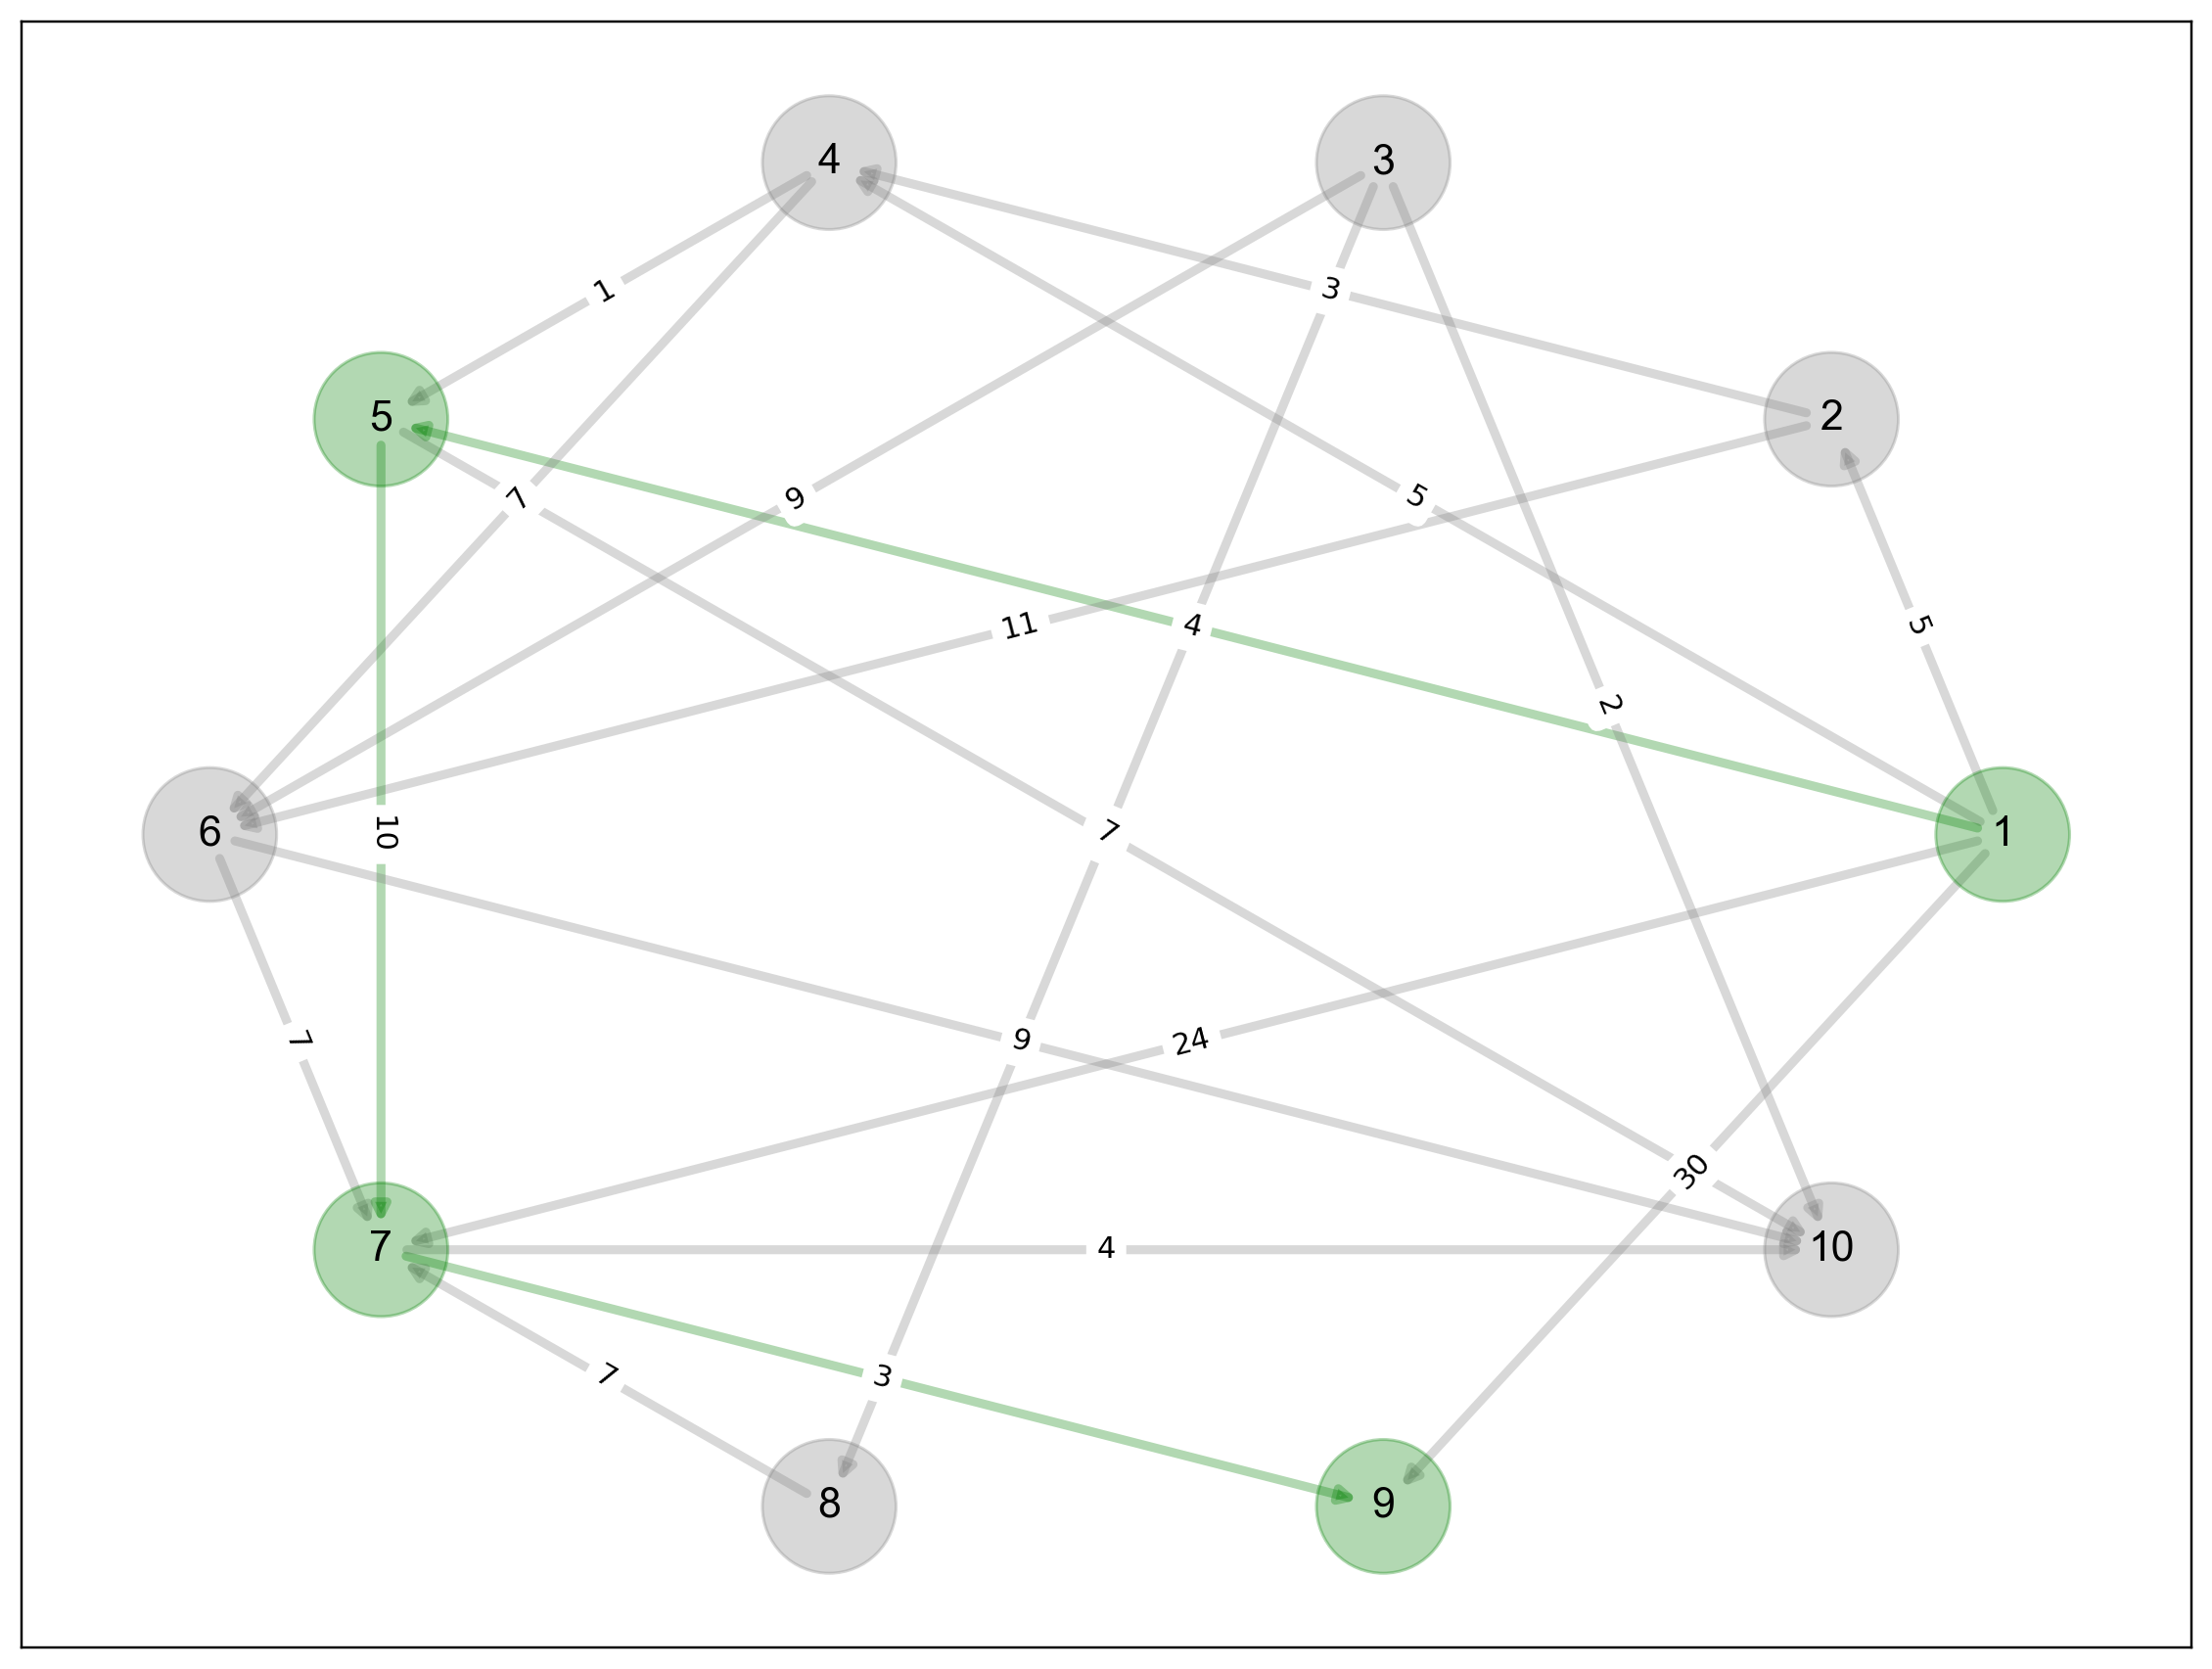

In [7]:
def johnsons_path(matrix, start, end):      
    start -= 1
    end -= 1
    bf_path, bf_dist = bellman_ford_path(copy.deepcopy(matrix), start, end) 
    
    if bf_dist == []: 
        return []
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                matrix[i][j] += bf_dist[i] - bf_dist[j]
    
    paths = []
    dist = []
    for i in range(len(matrix)):
        p, d = dijkstra_path(matrix, i + 1, end + 1)
        paths.append(p)
        dist.append(d)
        
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if dist[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                dist[i][j] +=  bf_dist[j] - bf_dist[i]
    return paths[start]

start = 1
end = 9
create_graph(graph, matrix, way = johnsons_path(copy.deepcopy(adj_matrix),start,end))  


# Алгоритм Левита

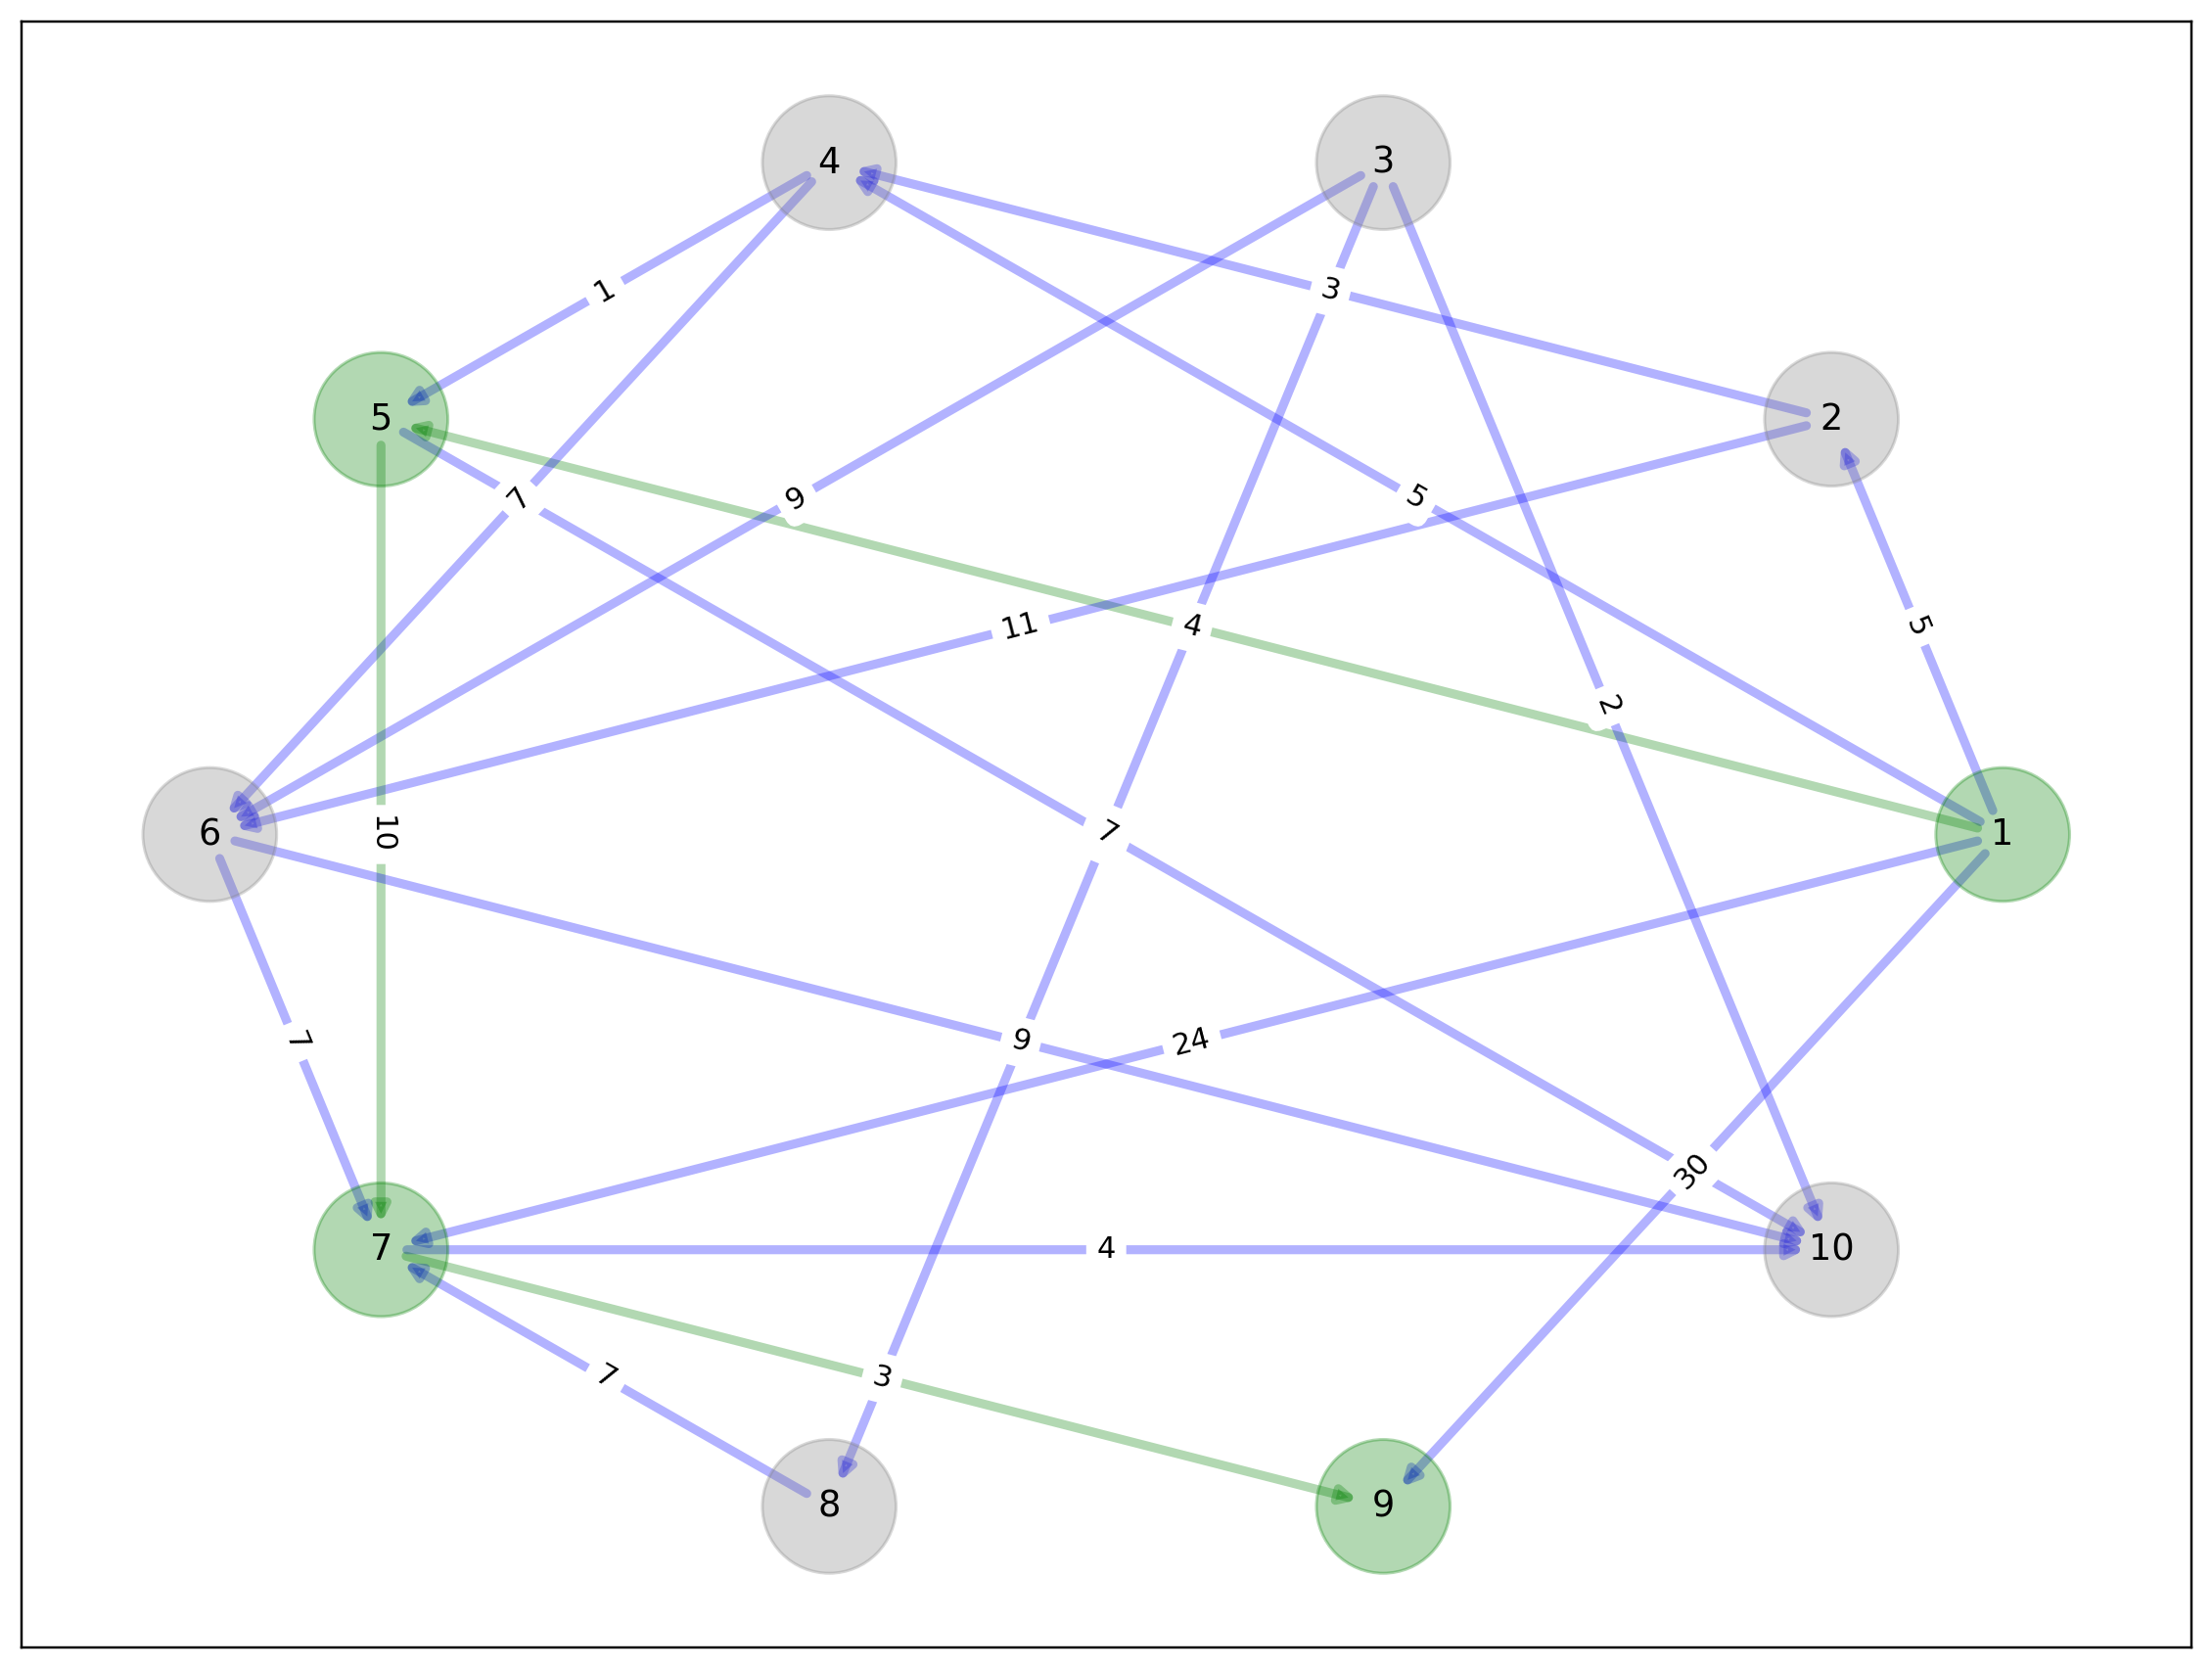

In [8]:
def levit_path(matrix, start, end):
    start -= 1
    end -= 1
    researched = []
    queues = {1 : [start], 2 : []}
    not_visited = [i for i in range(len(matrix))]
    not_visited.remove(start)
    dist = [math.inf] * len(matrix)
    dist[start] = 0
    path = [[start] for i in range(len(matrix))]
    while len(queues[1]) or len(queues[2]):
        if len(queues[2]) != 0:
            cur = queues[2].pop(0)
        else:
            cur = queues[1].pop(0)
        for ver in range(len(matrix)):
            
            
            if ver in not_visited:
                dist[ver] = dist[cur] + matrix[cur][ver]
                not_visited.remove(ver)
                queues[1].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
            elif ver in queues[1] or ver in queues[2]:
                if matrix[cur][ver] != math.inf and dist[ver] > dist[cur] + matrix[cur][ver]:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
                dist[ver] = min(dist[ver], dist[cur] + matrix[cur][ver])
                
                
            elif ver in researched and dist[ver] > dist[cur] + matrix[cur][ver]:
                
                dist[ver] = dist[cur] + matrix[cur][ver]
                researched.remove(ver)
                queues[2].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
 
        researched.append(cur)
    
    result = path[end]
    for i in range(len(result)):
        result[i] += 1
    return result
    
start = 1
end = 9
create_graph(graph, matrix, way = levit_path(copy.deepcopy(adj_matrix), start, end))


# Алгоритм Йена

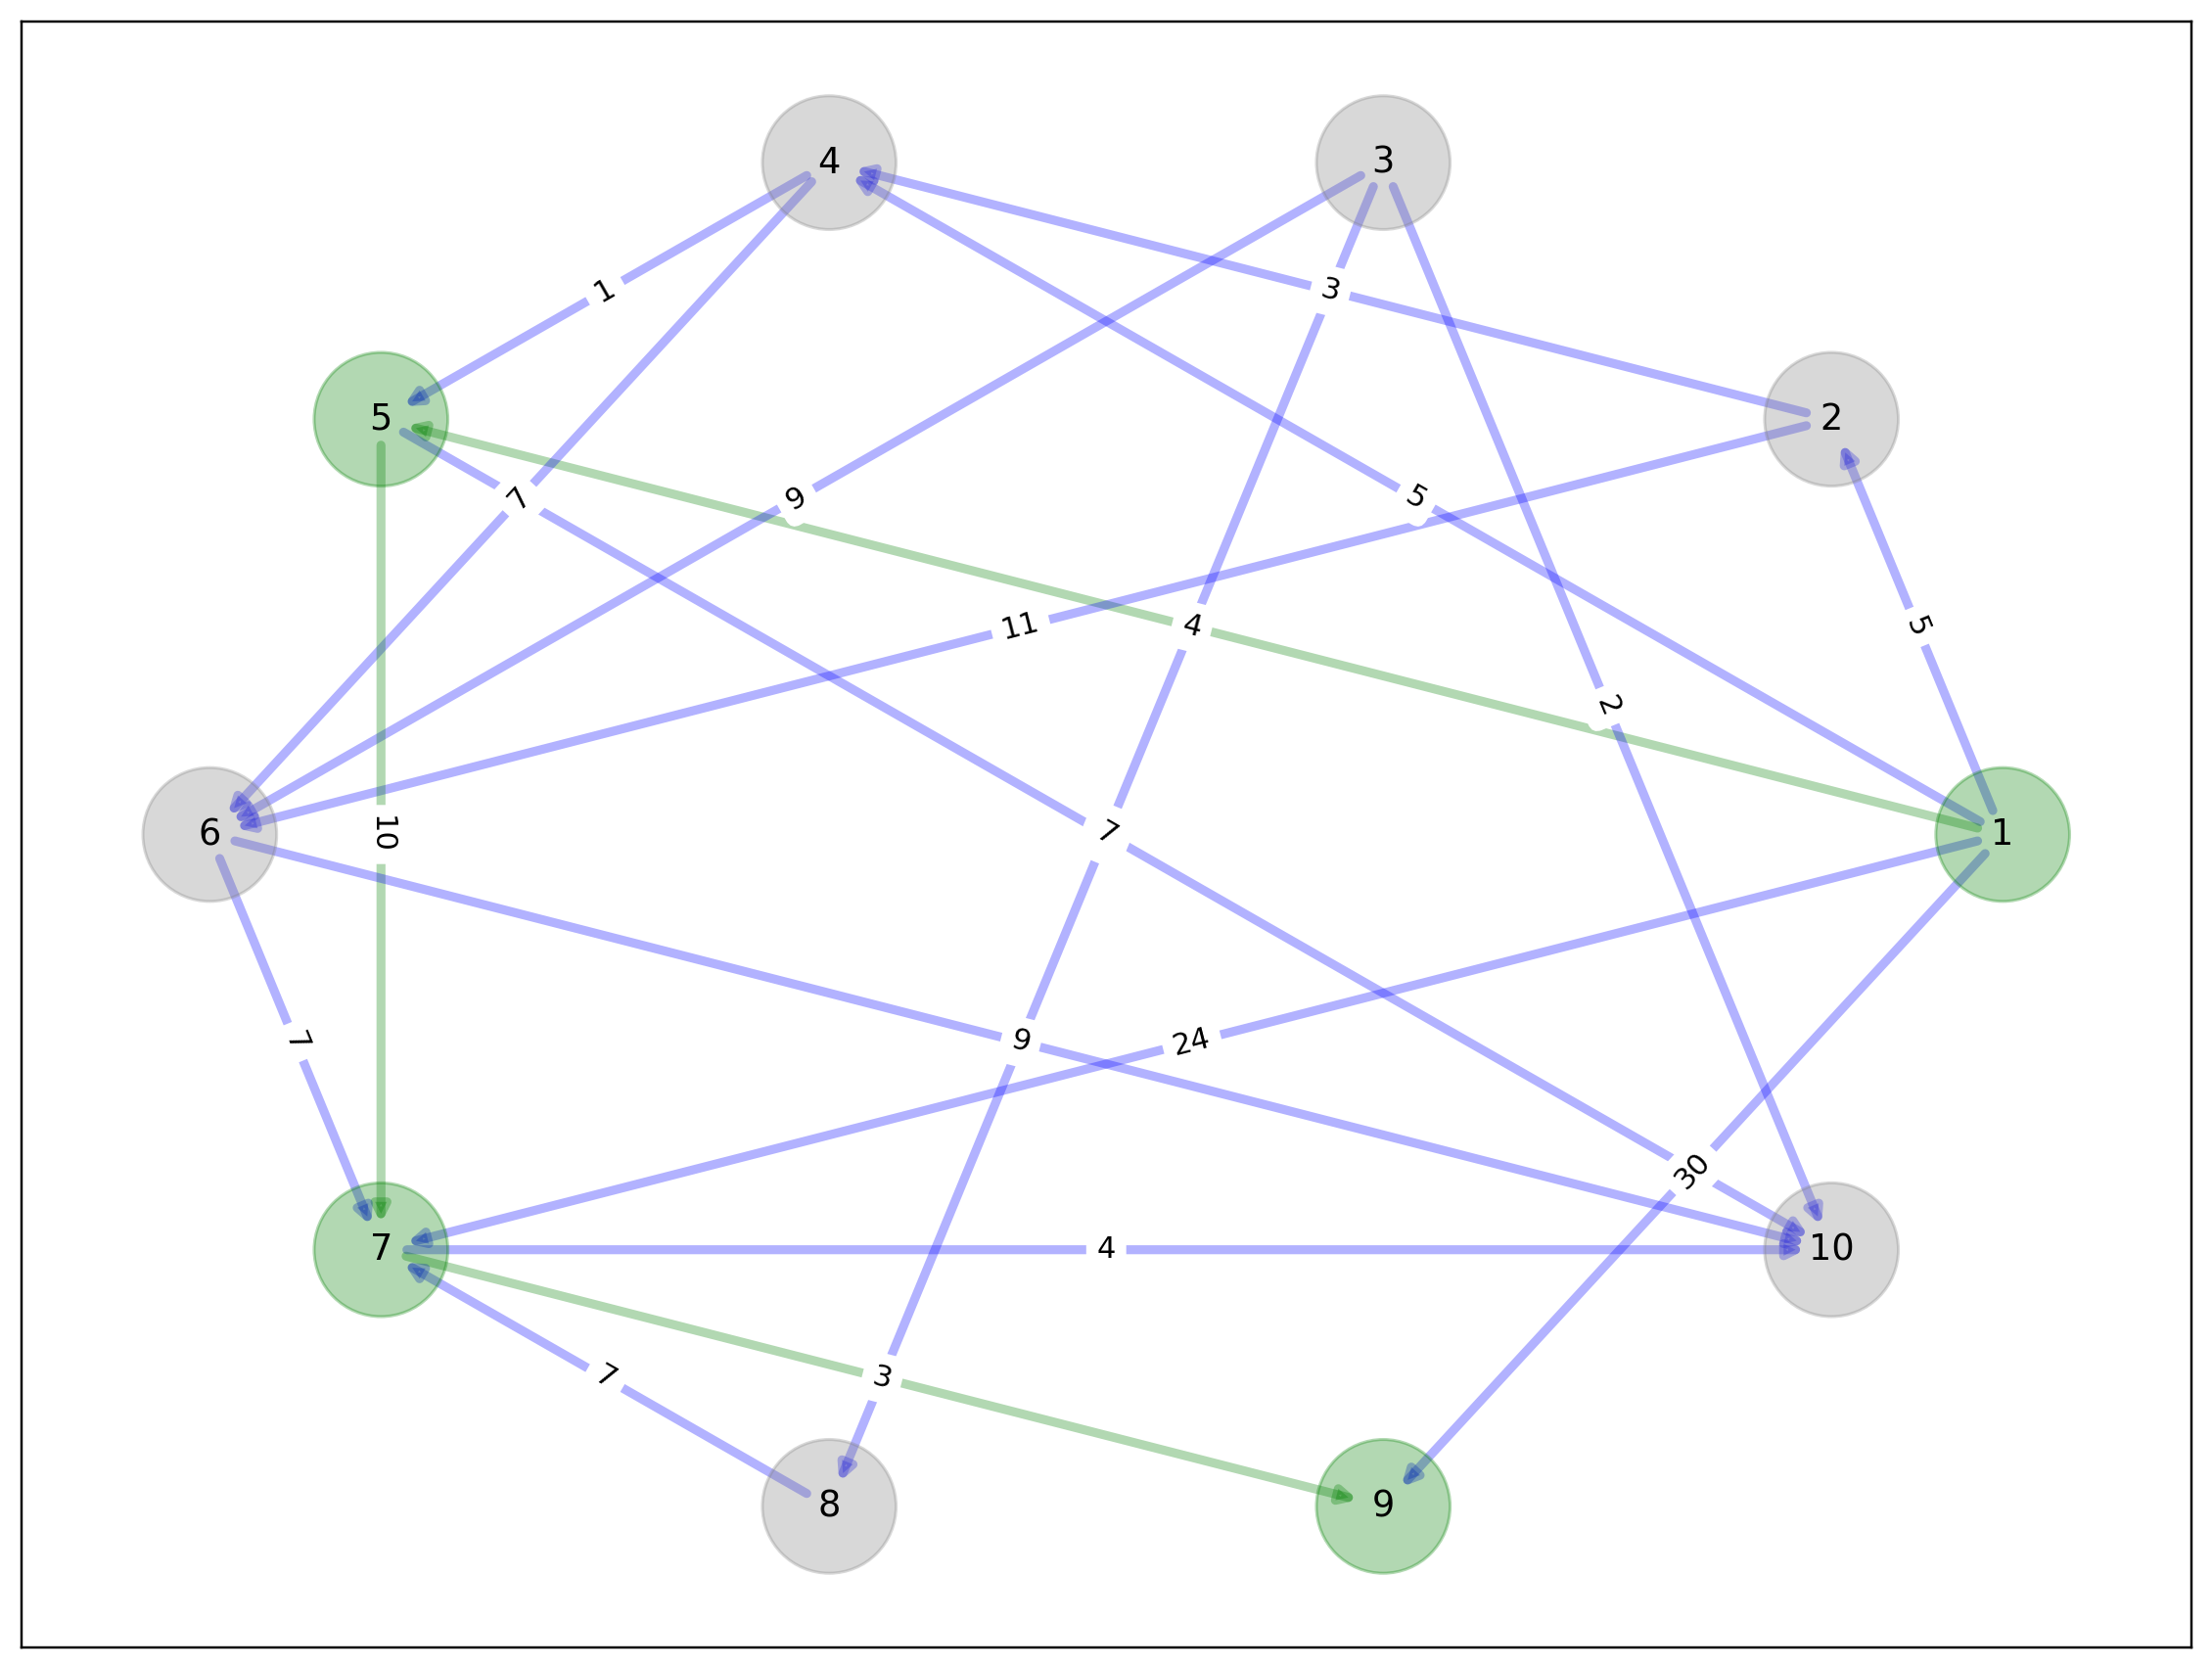

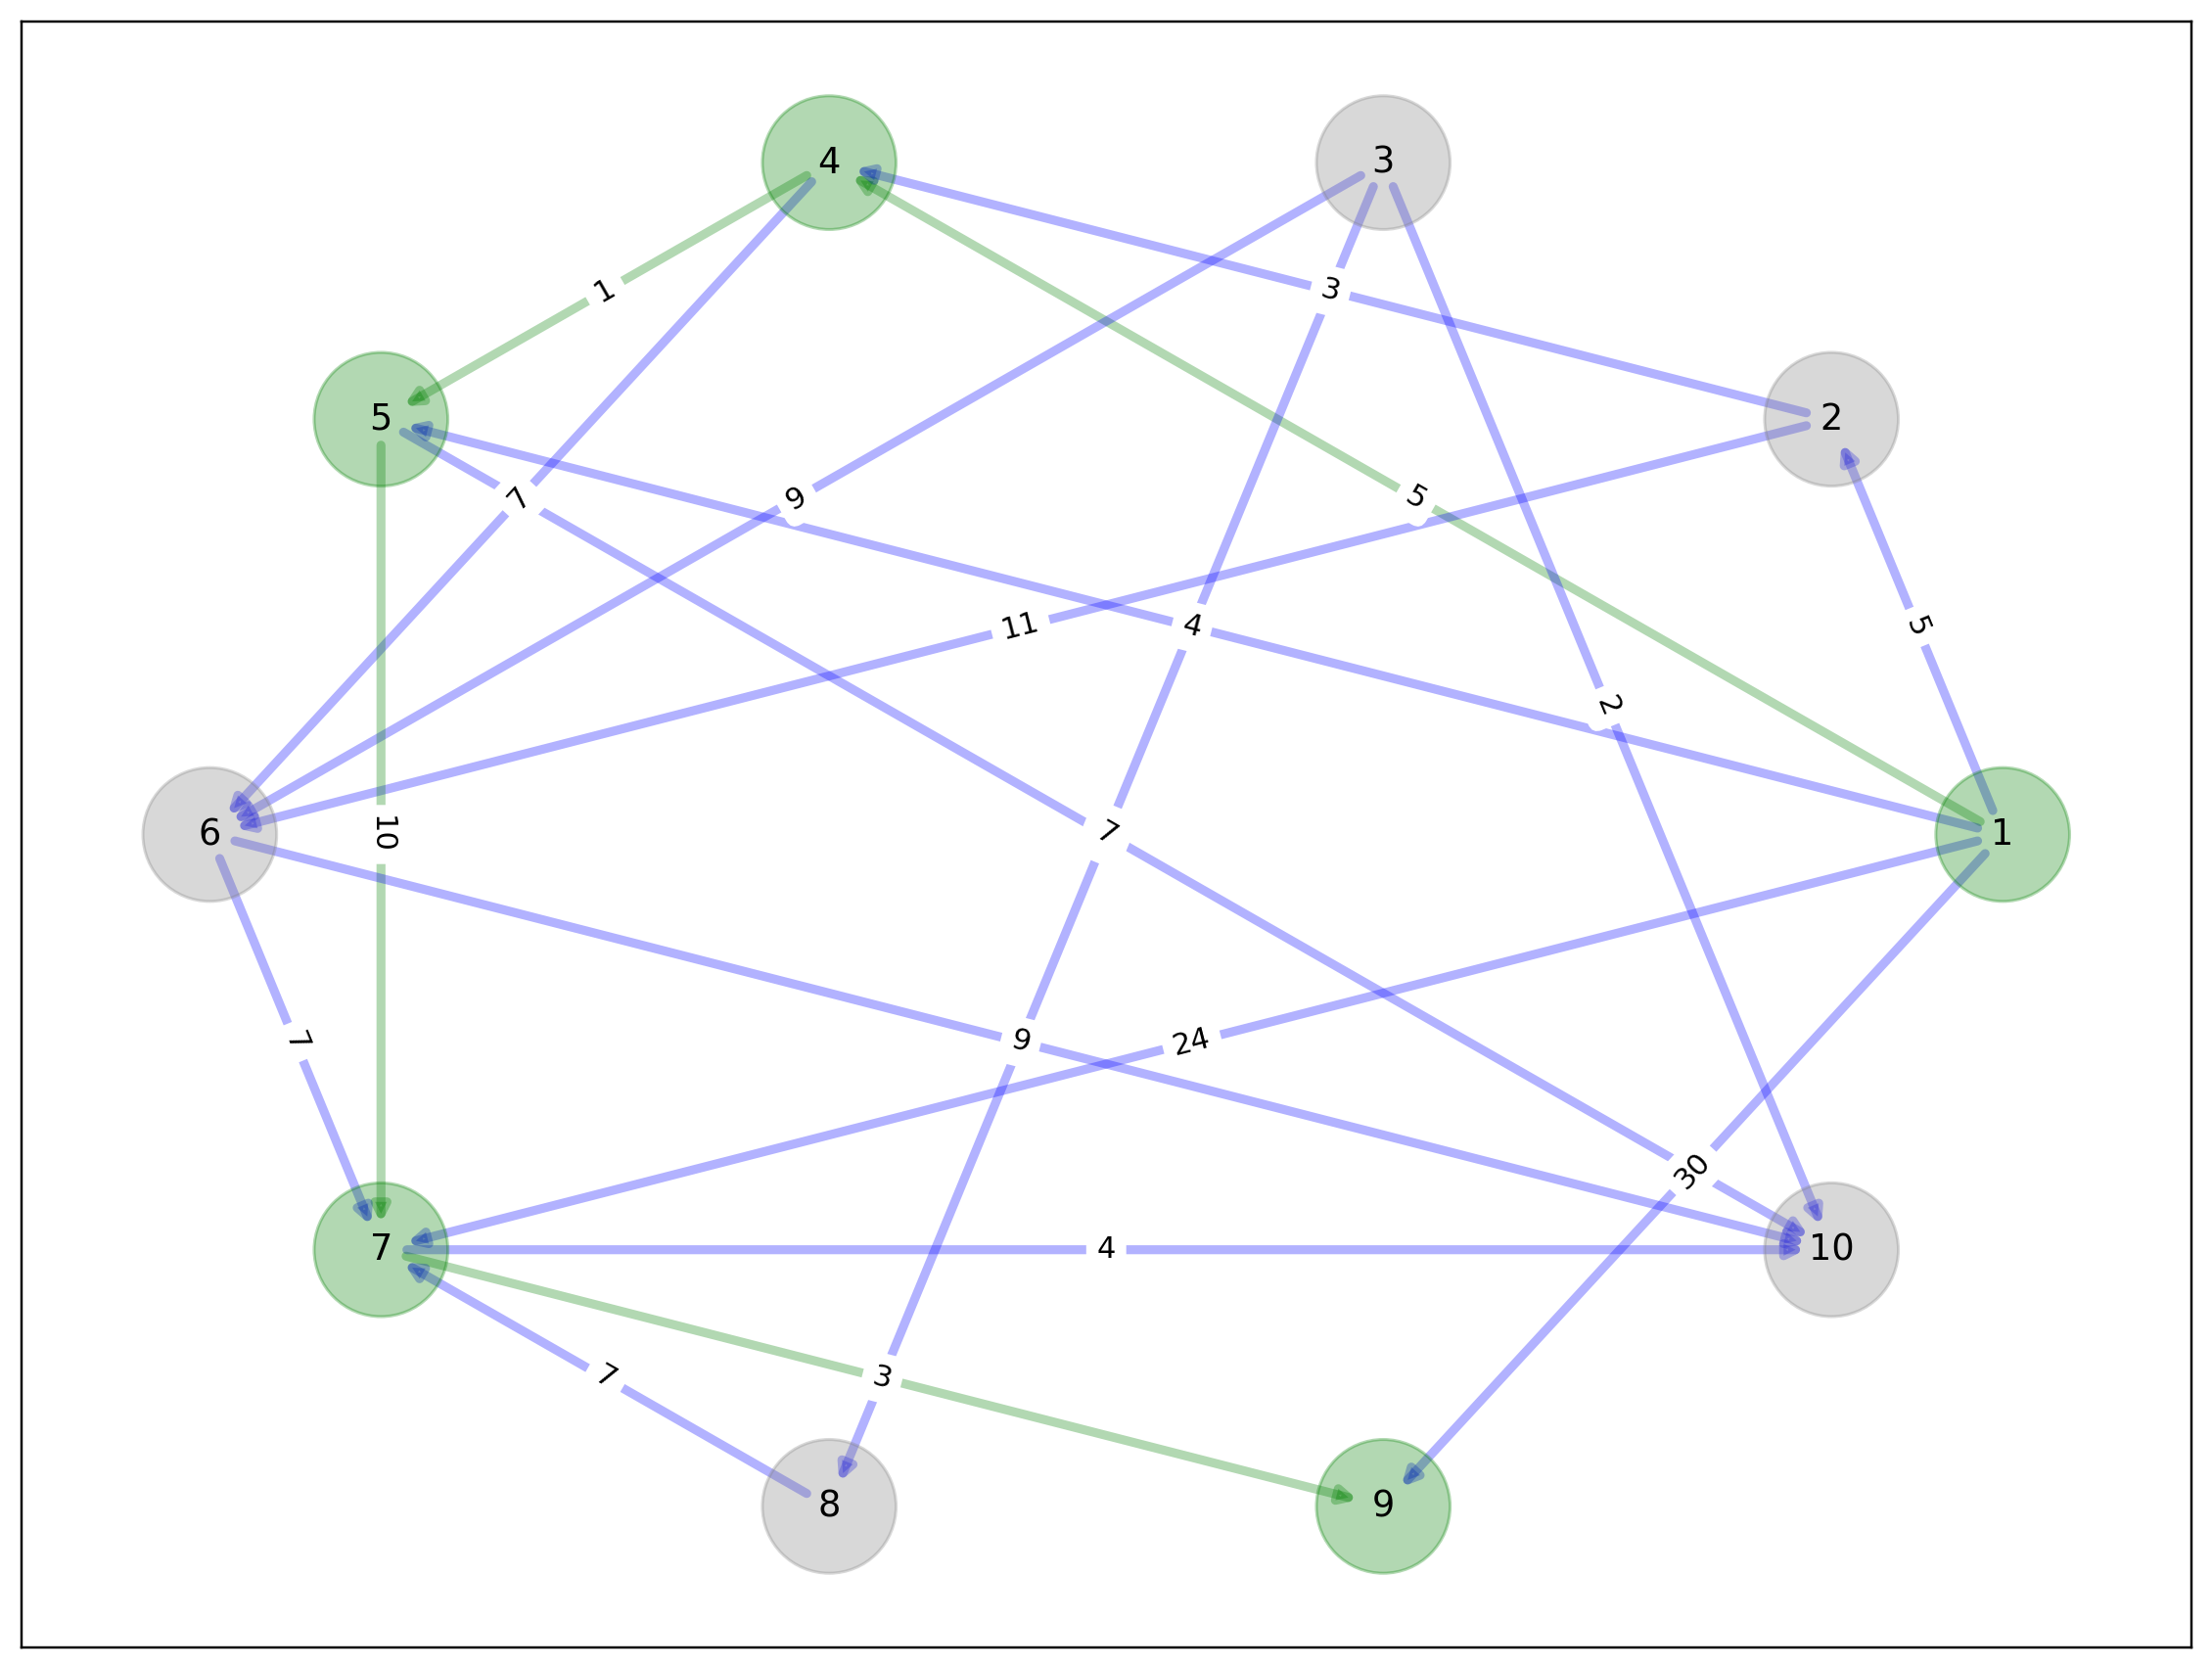

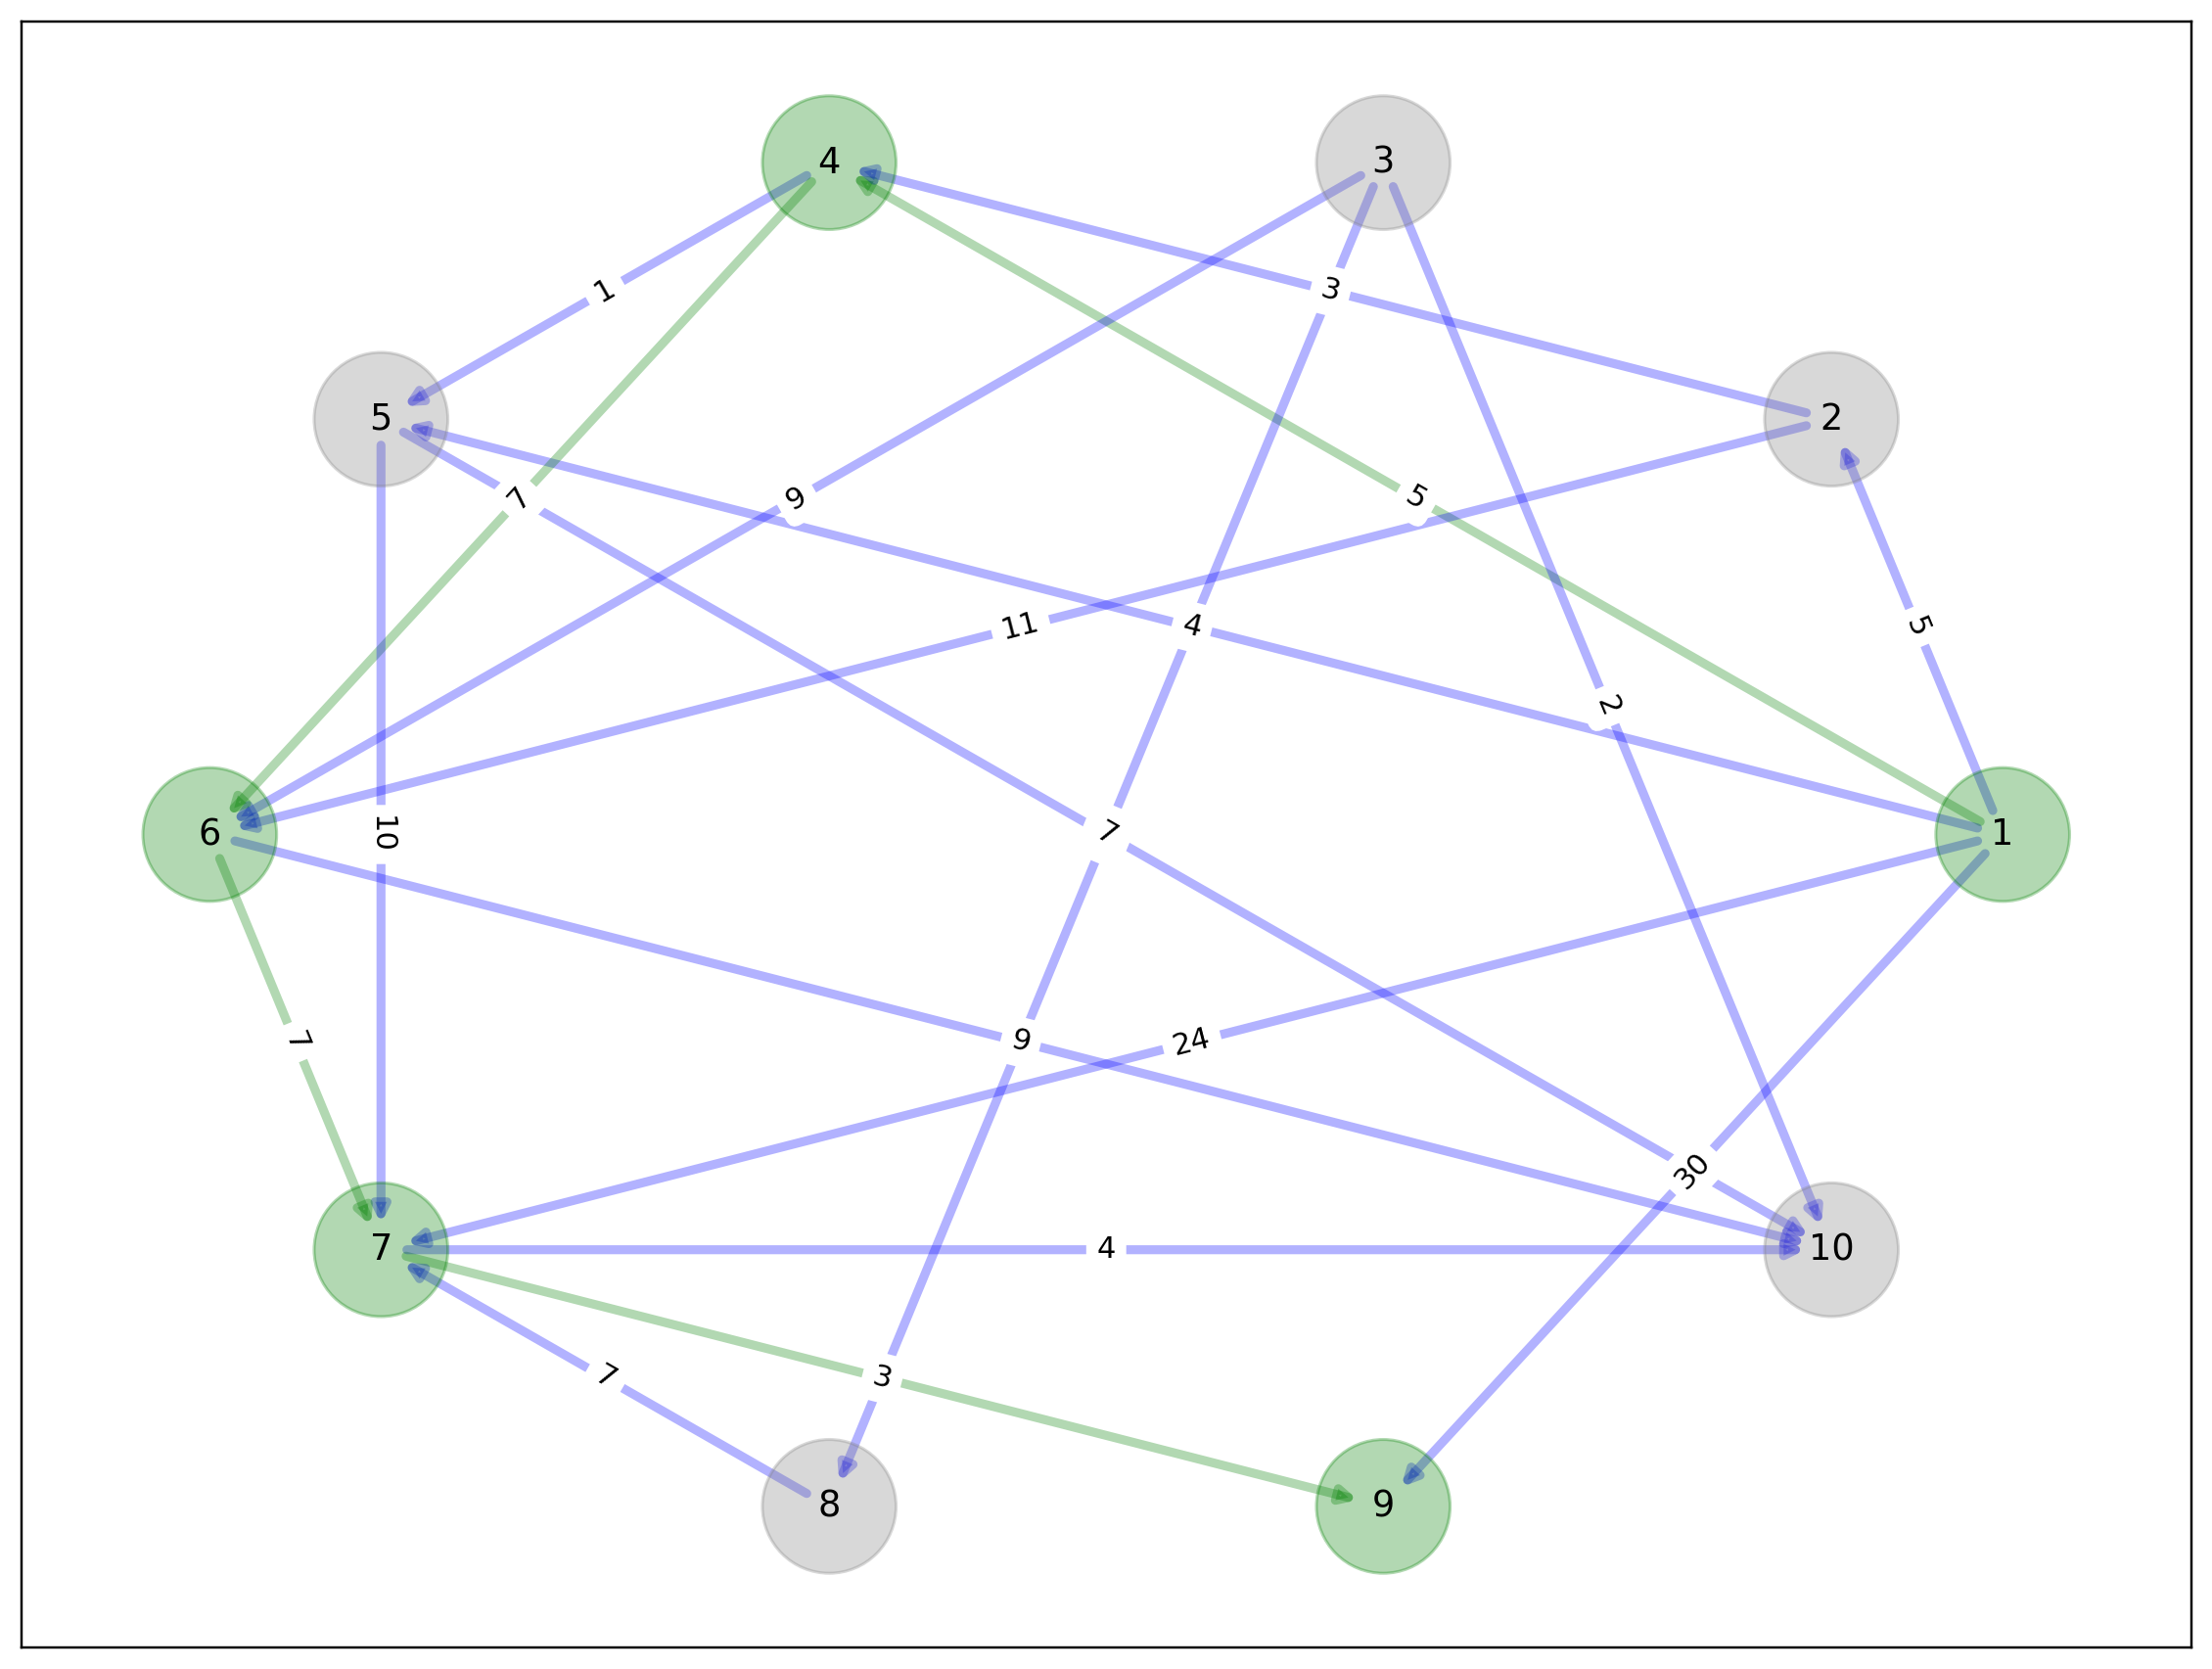

In [9]:
def md_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    return result[::-1]

def mod_dijkstra(matrix, start):
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
   
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node
    
    paths = []
    for i in range(len(matrix)):
        paths.append(md_get_path(prev, start, i))
    return dist, paths
    
def yen_path(matrix, start, end, k_max = 1):
    candidates = set()
    start -= 1
    end -= 1
    
    d, p = mod_dijkstra(matrix, start)
    paths = [p[end]]
    dists = [d[end]]
    
    for k in range(1, k_max):
        cur_matrix = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            node_spur = paths[-1][i]
            path_root = paths[-1][:i + 1]
            
            for line in paths:
                if path_root == line[:i + 1] and i + 1 < len(line):
                    cur_matrix[line[i]][line[i + 1]] = math.inf        
                        
            for node in path_root:
                if node != node_spur:
                    cur_matrix[node] = [math.inf] * len(matrix)

            d, p = mod_dijkstra(cur_matrix, node_spur)

            spur_path = p[end][1:]
            if len(spur_path) != 0:
                f_path = path_root
                for t_node in spur_path:
                    f_path.append(t_node)
                f_path = tuple(f_path)
                f_dist = 0
                for j in range(1, len(f_path)):
                    f_dist += matrix[f_path[j - 1]][f_path[j]]
                candidates.add((f_path, f_dist))
                
            if not len(candidates):
                break
            
            temp_candidates = list(candidates)
            paths.append(list(temp_candidates[0][0]))
            dists.append(temp_candidates[0][1])
            candidates.remove(temp_candidates[0])
            
    result = []
    for i in range(len(paths)):
        for j in range(len(paths[i])):
            paths[i][j] += 1
        if len(result) < k_max:
            result.append(paths[i])
        else:
            return result

start = 1
end = 9
paths = yen_path(copy.deepcopy(adj_matrix), start, end, 3) 
for way in paths:
    create_graph(graph, matrix, way = way)